In [25]:
# Author: University of Washington Center for Human Rights
# Date: 2020-11-24
# License: GPL 3.0 or greater
# Path: ice-air/installment3/analyze/note/missions.ipynb

import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
read_csv_opts = {'sep': '|',
                 'quotechar': '"',
                 'compression': 'gzip',
                 'encoding': 'utf-8',
#                  'dtype': column_types,
                 'parse_dates': ['MissionDate'],
                 'infer_datetime_format': True}

df = pd.read_csv('../input/ARTS_Missions-redacted.csv.gz', **read_csv_opts)

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   MissionID                  3182 non-null   int64         
 1   MissionNumber              3182 non-null   int64         
 2   MsnTailNumber              3182 non-null   object        
 3   MissionDate                3182 non-null   datetime64[ns]
 4   MissionFY                  3182 non-null   int64         
 5   MissionMonth               3182 non-null   int64         
 6   MissionWeek                3182 non-null   int64         
 7   MsnStart                   3182 non-null   object        
 8   MsnStpOne                  3155 non-null   object        
 9   MsnStpTwo                  2242 non-null   object        
 10  MsnStpThree                817 non-null    object        
 11  MsnStpFour                 154 non-null    object        
 12  MsnStp

In [27]:
df.head()

,MissionID,MissionNumber,MsnTailNumber,MissionDate,MissionFY,MissionMonth,MissionWeek,MsnStart,MsnStpOne,MsnStpTwo,...,msnVendor,msnInvoiceNumber,MissionQuarter,MissionYear,MissionTotalCost,ManifestedPassengers,StruckPassengers,MissionPassengers,PlannedMissionUtilization,MissionUtilization
0,47112,190010,(B)(7)(E),2018-10-01,2019,10,40,(B)(7)(E),(B)(7)(E),(B)(7)(E),...,CAC,20181007A,4,2018,(B)(4),70,6,64,0.518519,0.474074
1,47113,190009,(B)(7)(E),2018-10-01,2019,10,40,(B)(7)(E),(B)(7)(E),NaN,...,CAC,20181007A,4,2018,(B)(4),79,0,79,0.585185,0.585185
2,47114,190038,(B)(7)(E),2018-10-01,2019,10,40,(B)(7)(E),(B)(7)(E),(B)(7)(E),...,CAC,20181007A,4,2018,(B)(4),199,13,186,1.474074,1.377778
3,47115,190011,(B)(7)(E),2018-10-01,2019,10,40,(B)(7)(E),(B)(7)(E),(B)(7)(E),...,CAC,20181007A,4,2018,(B)(4),116,7,109,0.859259,0.807407
4,47116,190016,(B)(7)(E),2018-10-02,2019,10,40,(B)(7)(E),(B)(7)(E),(B)(7)(E),...,CAC,20181007A,4,2018,(B)(4),201,19,182,1.488889,1.348148


In [28]:
df.loc[0]

MissionID                                  47112
MissionNumber                             190010
MsnTailNumber                         (B)(7)(E) 
MissionDate                  2018-10-01 00:00:00
MissionFY                                   2019
MissionMonth                                  10
MissionWeek                                   40
MsnStart                              (B)(7)(E) 
MsnStpOne                             (B)(7)(E) 
MsnStpTwo                             (B)(7)(E) 
MsnStpThree                                  NaN
MsnStpFour                                   NaN
MsnStpFive                                   NaN
MsnStpSix                                    NaN
MsnStpSeven                                  NaN
MsnStpEight                                  NaN
MsnEnd                                (B)(7)(E) 
msnDelayReason                               NaN
msnCancelReason                              NaN
msnFlightODCCost                          (B)(4)
msnProposedFines    

In [29]:
mission_airports = pd.read_csv('../output/mission_airports.csv.gz', sep='|')

In [30]:
mission_airports

,MissionID,PULOC,DropLoc,air_AirportName,air2_AirportName
0,51719,KBRO,MGGT,Brownsville South Padre Island International A...,La Aurora Airport
1,51748,KIWA,MMGL,Phoenix-Mesa-Gateway Airport,Miguel Hidalgo y Costilla International Airport
2,51446,KAEX,MTPP,Alexandria International Airport,Toussaint Louverture International Airport
3,51439,KIWA,KYKM,Phoenix-Mesa-Gateway Airport,Yakima Air Terminal
4,51439,KIWA,KELP,Phoenix-Mesa-Gateway Airport,El Paso International Airport
...,...,...,...,...,...
7900,51437,KIAH,MSLP,George Bush Intercontinental Houston Airport,El Salvador International Airport
7901,51438,KAEX,KMDT,Alexandria International Airport,Harrisburg International Airport
7902,51438,KAEX,KBRO,Alexandria International Airport,Brownsville South Padre Island International A...
7903,51438,KMDT,KAEX,Harrisburg International Airport,Alexandria International Airport


In [31]:
pulocs = mission_airports.groupby('MissionID')['PULOC'].unique()
droplocs = mission_airports.groupby('MissionID')['DropLoc'].unique()

In [32]:
pulocs_df = pulocs.apply(pd.Series)

In [33]:
droplocs_df = droplocs.apply(pd.Series)

In [34]:
pulocs_df.columns = [f'puloc_{i+1}' for i in pulocs_df.columns]
droplocs_df.columns = [f'droploc_{i+1}' for i in droplocs_df.columns]

In [35]:
stops = pd.concat([pulocs_df, droplocs_df], axis=1)

In [36]:
# Partially reconstructed itinerary for each MissionID
stops

,puloc_1,puloc_2,puloc_3,puloc_4,puloc_5,droploc_1,droploc_2,droploc_3,droploc_4,droploc_5
MissionID,,,,,,,,,,
47112,KMIA,KATL,NaN,NaN,NaN,MHLM,NaN,NaN,NaN,NaN
47113,KATL,NaN,NaN,NaN,NaN,KBRO,NaN,NaN,NaN,NaN
47114,KBRO,KMDT,KAEX,NaN,NaN,KMDT,KAEX,KBRO,NaN,NaN
47115,KIAH,NaN,NaN,NaN,NaN,MHLM,NaN,NaN,NaN,NaN
47116,KIWA,KLAS,KBFI,KELP,NaN,KBFI,KELP,KIWA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
52225,KIWA,NaN,NaN,NaN,NaN,MSLP,NaN,NaN,NaN,NaN
52226,KGYY,NaN,NaN,NaN,NaN,KDAL,NaN,NaN,NaN,NaN
52228,KAEX,KDAL,NaN,NaN,NaN,MHLM,NaN,NaN,NaN,NaN


In [37]:
df = df.set_index('MissionID')

In [38]:
df = pd.concat([df, stops], axis=1)

In [39]:
# Mission dataset with partially reconstructed itinerary
# Note we can have duplicate airports as `PULOC`, `DropLoc` for a given mission
df = df.reset_index()
df

,MissionID,MissionNumber,MsnTailNumber,MissionDate,MissionFY,MissionMonth,MissionWeek,MsnStart,MsnStpOne,MsnStpTwo,...,puloc_1,puloc_2,puloc_3,puloc_4,puloc_5,droploc_1,droploc_2,droploc_3,droploc_4,droploc_5
0,47112,190010.0,(B)(7)(E),2018-10-01,2019.0,10.0,40.0,(B)(7)(E),(B)(7)(E),(B)(7)(E),...,KMIA,KATL,NaN,NaN,NaN,MHLM,NaN,NaN,NaN,NaN
1,47113,190009.0,(B)(7)(E),2018-10-01,2019.0,10.0,40.0,(B)(7)(E),(B)(7)(E),NaN,...,KATL,NaN,NaN,NaN,NaN,KBRO,NaN,NaN,NaN,NaN
2,47114,190038.0,(B)(7)(E),2018-10-01,2019.0,10.0,40.0,(B)(7)(E),(B)(7)(E),(B)(7)(E),...,KBRO,KMDT,KAEX,NaN,NaN,KMDT,KAEX,KBRO,NaN,NaN
3,47115,190011.0,(B)(7)(E),2018-10-01,2019.0,10.0,40.0,(B)(7)(E),(B)(7)(E),(B)(7)(E),...,KIAH,NaN,NaN,NaN,NaN,MHLM,NaN,NaN,NaN,NaN
4,47116,190016.0,(B)(7)(E),2018-10-02,2019.0,10.0,40.0,(B)(7)(E),(B)(7)(E),(B)(7)(E),...,KIWA,KLAS,KBFI,KELP,NaN,KBFI,KELP,KIWA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,52225,201076.0,(B)(7)(E),2020-03-22,2020.0,3.0,13.0,(B)(7)(E),(B)(7)(E),NaN,...,KIWA,NaN,NaN,NaN,NaN,MSLP,NaN,NaN,NaN,NaN
3230,52226,201028.0,(B)(7)(E),2020-03-15,2020.0,3.0,12.0,(B)(7)(E),(B)(7)(E),(B)(7)(E),...,KGYY,NaN,NaN,NaN,NaN,KDAL,NaN,NaN,NaN,NaN
3231,52228,201086.0,(B)(7)(E),2020-03-27,2020.0,3.0,13.0,(B)(7)(E),(B)(7)(E),(B)(7)(E),...,KAEX,KDAL,NaN,NaN,NaN,MHLM,NaN,NaN,NaN,NaN
3232,52231,201214.0,(B)(7)(E),2020-04-19,2020.0,4.0,17.0,(B)(7)(E),(B)(7)(E),(B)(7)(E),...,KBRO,KELP,NaN,NaN,NaN,MGGT,NaN,NaN,NaN,NaN


In [40]:
df.to_csv('../output/ARTS_Missions-redacted.csv.gz', sep='|', compression='gzip', index=False)

In [41]:
# % of ppl struck per flight?

In [42]:
df['PctStruck'] = df['StruckPassengers'] / df['ManifestedPassengers']

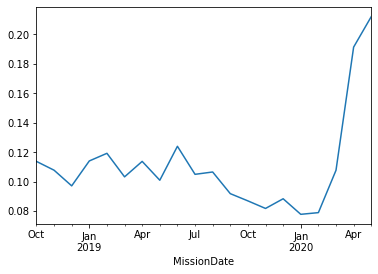

In [43]:
df.set_index('MissionDate').groupby(pd.Grouper(freq='M'))['PctStruck'].mean().plot()

In [44]:
# More struck in some kinds of flights versus others? Domestic versus intl?